Complete each problem below and print to pdf. Submit the pdf.

You will need to work with the three datasets attached to this assignment:

*   poverty.csv
*   poverty_2.csv
*   real_estate.csv

# Problem 1: Univariate Linear Regression

## 1) import the libraries you will need:
numpy 
pandas
matplotlab.pyplot
statsmodels.api

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from google.colab import files




/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2) Import the date poverty.csv dataset 

In [3]:

url = 'https://raw.githubusercontent.com/nnguyen09/Machine-Learning-/master/assignment2/poverty.csv'
df = pd.read_csv(url)
df.head()


,Location,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
0,Alabama,20.1,31.5,88.7,11.2,54.5
1,Alaska,7.1,18.9,73.7,9.1,39.5
2,Arizona,16.1,35.0,102.5,10.4,61.2
3,Arkansas,14.9,31.6,101.7,10.4,59.9
4,California,16.7,22.6,69.1,11.2,41.1


## 3) Print the dataset indexed upon the location column.

In [4]:
df['Location']

0                  Alabama
1                   Alaska
2                  Arizona
3                 Arkansas
4               California
5                 Colorado
6              Connecticut
7                 Delaware
8     District_of_Columbia
9                  Florida
10                 Georgia
11                  Hawaii
12                   Idaho
13                Illinois
14                 Indiana
15                    Iowa
16                  Kansas
17                Kentucky
18               Louisiana
19                   Maine
20                Maryland
21           Massachusetts
22                Michigan
23               Minnesota
24             Mississippi
25                Missouri
26                 Montana
27                Nebraska
28                  Nevada
29           New_Hampshire
30              New_Jersey
31              New_Mexico
32                New_York
33          North_Carolina
34            North_Dakota
35                    Ohio
36                Oklahoma
3

## 4) Get useful descriptive statistial data on the dataset.
Hint: this is a single line, data._____ 

In [5]:
df.describe()

,PovPct,Brth15to17,Brth18to19,ViolCrime,TeenBrth
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,13.117647,22.282353,72.019608,7.854902,42.243137
std,4.277228,8.043499,18.975563,8.914131,12.318511
min,5.300000,8.100000,39.000000,0.900000,20.000000
25%,10.250000,17.250000,58.300000,3.900000,33.900000
50%,12.200000,20.000000,69.400000,6.300000,39.500000
75%,15.800000,28.100000,87.950000,9.450000,52.600000
max,25.300000,44.800000,104.300000,65.000000,69.100000


##5) Print the columns

In [6]:
df.columns

Index(['Location', 'PovPct', 'Brth15to17', 'Brth18to19', 'ViolCrime',
       'TeenBrth'],
      dtype='object')

## 6) Create a regression line based upon the dependent and independent variables:
PovPct 
Brth18to19

In this step only create a scatterplot of the two variables, simply plotting the data.

Note: The variable PovPct is the percent of a state’s population in 2000 living in households with incomes below the federally defined poverty level. 

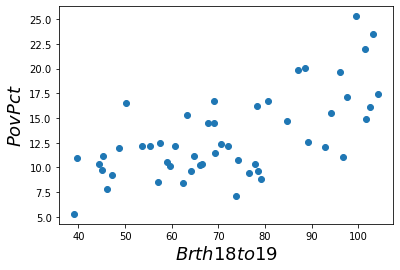

In [64]:
y=df['PovPct']
x=df['Brth18to19']
plt.ylabel("$PovPct$", fontsize = 18)
plt.xlabel("$Brth18to19$", fontsize = 18)
plt.scatter(x, y)


## 7) Lets create a new variable, x1, as well as the results variable:
Example would be
1.   x1 = sm.add_constant(x)
2.   results = sm.OLS(y, x1).fit()
3.   results.summary()

This gives you the OLS Regression results, the coefficients table, and some additional tests. The data that you are interested in is the coefficient values. This is the value for the constant you created is b0, and birth19to19 is b1 in the regression equation.


In [73]:
x1 = sm.add_constant(x)
result = sm.OLS(y,x1).fit()
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                 PovPct   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     35.78
Date:                Sat, 19 Feb 2022   Prob (F-statistic):           2.50e-07
Time:                        04:06:59   Log-Likelihood:                -132.00
No. Observations:                  51   AIC:                             268.0
Df Residuals:                      49   BIC:                             271.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5712      1.822      1.411      0.1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


## 8) Taking the coeffient values for the new constant and the Y variable, create a scatterplot:

e.g. 
yhat = 0.1464*x + 0.25712
fig = plt.plot(x, yhat, lw=4, c='red', label = 'regression line')

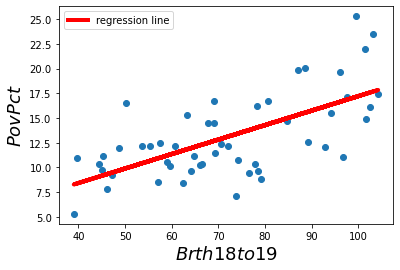

In [74]:
yhat = 0.1464*x + 2.5712
plt.ylabel("$PovPct$", fontsize = 18)
plt.xlabel("$Brth18to19$", fontsize = 18)
plt.scatter(x, y)
fig = plt.plot(x, yhat,lw=4, c= 'red',label = 'regression line')
plt.legend(loc='upper left')

# Problem 2: Implement code from lecture

## 1) Perform linear regression using the normal equation, as done in slides.

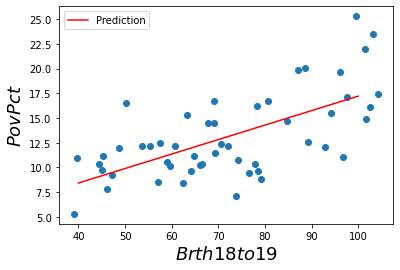

In [75]:


plt.ylabel("$PovPct$", fontsize = 18)
plt.xlabel("$Brth18to19$", fontsize = 18)
plt.scatter(x,y)
X_b = np.c_[np.ones((x.size,1)),x] #add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best
X_new= np.array([[40],[100]])
X_new_b = np.c_[np.ones((2,1)), X_new] #add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict
plt.plot(X_new, y_predict, c="red", label = "Prediction")
plt.legend(loc = "upper left")

## 2) Perform linear regression using Scikit-Learn, as done in the slides.

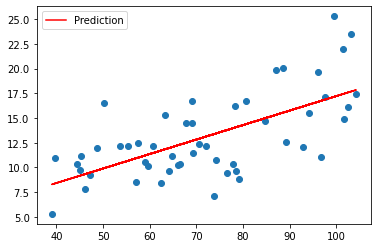

In [68]:
from sklearn.linear_model import LinearRegression
plt.scatter(x,y)
x_new = np.c_[x]
y_new = np.c_[y]

lin_reg = LinearRegression()
lin_reg.fit(x_new,y_new) 
lin_reg.intercept_, lin_reg.coef_

plt.plot(x_new, lin_reg.coef_*x_new + lin_reg.intercept_, c='red', label='Prediction')
plt.legend(loc = 'upper left')


# Problem 3: Multivariate Linear Regression
In this problem we will continue using the poverty dataset. Do poverty and violent crimes affect teen pregnancy?

## 1) import the libraries you will need:
numpy 
pandas
matplotlab.pyplot
statsmodels.api

In [76]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize


## 2) Import the dataset, poverty_2.csv, and print it.


In [77]:
url_2 = 'https://raw.githubusercontent.com/nnguyen09/Machine-Learning-/master/assignment2/poverty_2.csv'
data= pd.read_csv(url_2)
print(data)

    PovPct  ViolCrime  TeenBrth
0     20.1       11.2      54.5
1      7.1        9.1      39.5
2     16.1       10.4      61.2
3     14.9       10.4      59.9
4     16.7       11.2      41.1
5      8.8        5.8      47.0
6      9.7        4.6      25.8
7     10.3        3.5      46.3
8     22.0       65.0      69.1
9     16.2        7.3      44.5
10    12.1        9.5      55.7
11    10.3        4.7      38.2
12    14.5        4.1      39.1
13    12.4       10.3      42.2
14     9.6        8.0      44.6
15    12.2        1.8      32.5
16    10.8        6.2      43.0
17    14.7        7.2      51.0
18    19.7       17.0      58.1
19    11.2        2.0      25.4
20    10.1       11.8      35.4
21    11.0        3.6      23.3
22    12.2        8.5      34.8
23     9.2        3.9      27.5
24    23.5       12.9      64.7
25     9.4        8.8      44.1
26    15.3        3.0      36.4
27     9.6        2.9      37.0
28    11.1       10.7      53.9
29     5.3        1.8      20.0
30     7

## 3) We need to normalize the input variables.

In [78]:
from sklearn.preprocessing import normalize
data = normalize(data, axis=0)

## 4) Split the data into input variables, X, and the output variable, Y.

In [79]:
X=data[:,0:2]
Y=data[:,2:]

## 5) Graph the dataset with a seed of 42.
Replace the FILLINTHESEVALUES fields.

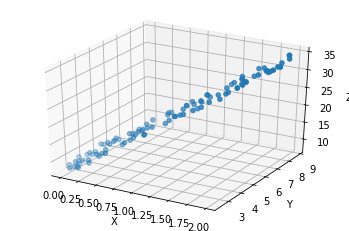

In [80]:
np.random.seed(42)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = 2*np.random.rand(100,1)
ys = 2+3*xs+np.random.rand(100,1)
zs = 4*xs+3*ys+np.random.rand(100,1)

ax.scatter(xs, ys, zs)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')


plt.show()

## 6) Implement  Gradient Descent.
This section has be provided. Please run and understand the code.

In [81]:
# hyperparameters
learning_rate = 0.05
max_iteration = 500

#parameters
theta = np.zeros((data.shape[1], 1))

In [82]:
def hypothesis (theta, X) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  return np.matmul(tempX, theta)

In [83]:
def loss (theta, X, Y) :
  return np.average(np.square(Y - hypothesis(theta, X))) / 2

In [84]:
def gradient (theta, X, Y) :
  tempX = np.ones((X.shape[0], X.shape[1] + 1))
  tempX[:,1:] = X
  d_theta = - np.average((Y - hypothesis(theta, X)) * tempX, axis= 0)
  d_theta = d_theta.reshape((d_theta.shape[0], 1))
  return d_theta

In [85]:
def gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    d_theta = gradient (theta, X, Y)
    theta = theta - learning_rate * d_theta
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

In [86]:
# Training model
theta, cost = gradient_descent (theta, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  0.008893757788504215
iteration :  100  loss :  0.0006811106575134702
iteration :  200  loss :  0.0006573219302696655
iteration :  300  loss :  0.0006360731168287809
iteration :  400  loss :  0.0006169026951758099


In [87]:
#optimal value is :
theta

array([[0.12381477],
       [0.04264512],
       [0.05698502]])

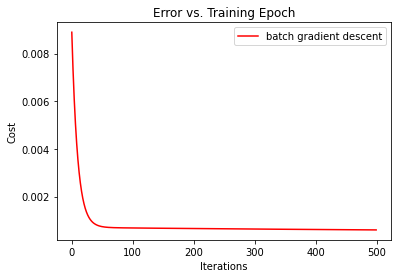

In [88]:
#plot cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.legend(loc='upper right', labels=['batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()

## 7) Implement Stochastic Gradient Descent. Please run.

In [90]:
def stochastic_gradient_descent (theta, X, Y, learning_rate, max_iteration, gap) :
  cost = np.zeros(max_iteration)
  for i in range(max_iteration) :
    for j in range(X.shape[0]):
      d_theta = gradient (theta, X[j,:].reshape(1, X.shape[1]), Y[j,:].reshape(1, 1))
      theta = theta - learning_rate * d_theta
    
    cost[i] = loss(theta, X, Y)
    if i % gap == 0 :
      print ('iteration : ', i, ' loss : ', loss(theta, X, Y)) 
  return theta, cost

In [91]:
theta_stoc = np.zeros((data.shape[1], 1))

In [92]:
theta_stoc, cost_stoc = stochastic_gradient_descent (theta_stoc, X, Y, learning_rate, max_iteration, 100)

iteration :  0  loss :  0.0007764556902156442
iteration :  100  loss :  0.0004037848207345314
iteration :  200  loss :  0.00036553095210465356
iteration :  300  loss :  0.000347847758744226
iteration :  400  loss :  0.00033956148785195


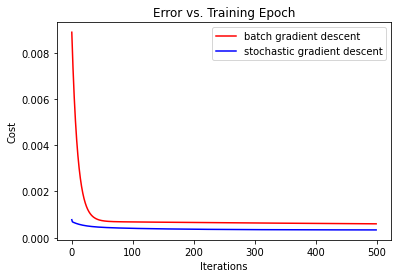

In [93]:
#plot the cost
fig, ax = plt.subplots()  
ax.plot(np.arange(max_iteration), cost, 'r')  
ax.plot(np.arange(max_iteration), cost_stoc, 'b')  
#ax.plot(np.arange(max_iteration), mb_cost, 'g')  
ax.legend(loc='upper right', labels=['batch gradient descent', 'stochastic gradient descent'])#, 'mini-batch gradient descent'])
ax.set_xlabel('Iterations')  
ax.set_ylabel('Cost')  
ax.set_title('Error vs. Training Epoch')  

plt.show()

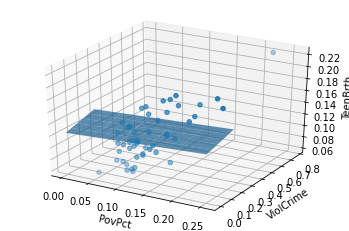

In [94]:
np.random.seed(42)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = Y
ax.scatter(xs, ys, zs)

ax.set_xlabel('PovPct')
ax.set_ylabel('ViolCrime')
ax.set_zlabel('TeenBrth')

# new 
x = y = np.arange(0, 0.3, 0.05)
xp, yp = np.meshgrid(x, y)
z = np.array([hypothesis(theta, np.array([[x,y]]))[0, 0] for x,y in zip(np.ravel(xp), np.ravel(yp))])
zp = z.reshape(xp.shape)

ax.plot_surface(xp, yp, zp, alpha=0.7)

plt.show()

# Problem 4, predict house price.

* import real_estate.csv 
* Are there any null values in the dataset? Drop any missing data if exist. 
* Create X as a 1-D array of the distance to the nearest MRT station, and y as the housing price
* What is the number of samples in the data set? To do this, you can look at the "shape" of X and y
* Split the data into train and test sets using sklearn's train_test_split, with test_size = 1/3
* Find the line of best fit using a Linear Regression and show the result of coefficients and intercept (you can use sklearn's linear regression)
* Using the predict method, make predictions for the test set and evaluate the performance (e.g., MSE or other metrics).

In [95]:

#import real_estate.csv
url_3 = 'https://raw.githubusercontent.com/nnguyen09/Machine-Learning-/master/assignment2/real_estate.csv'
data_real_estate = pd.read_csv(url_3)

print(data_real_estate.columns)

#Are there any null values in the dataset? Drop any missing data if exist.
data_real_estate.dropna(axis = 0, how = 'any')

#Create X as a 1-D array of the distance to the nearest MRT station, and y as the housing price
X=data_real_estate['X3 distance to the nearest MRT station'].array
print(X)
Y=data_real_estate['Y house price of unit area'].array
print(Y)

#What is the number of samples in the data set? To do this, you can look at the "shape" of X and y
print('Number of sample in data set is: ' , X.shape, Y.shape)





Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')
<PandasArray>
[84.87882, 306.5947, 561.9845, 561.9845, 390.5684,  2175.03, 623.4731,
 287.6025, 5512.038,  1783.18,
 ...
 289.3248, 130.9945, 372.1386, 2408.993, 2175.744, 4082.015, 90.45606,
 390.9696, 104.8101, 90.45606]
Length: 414, dtype: float64
<PandasArray>
[37.9, 42.2, 47.3, 54.8, 43.1, 32.1, 40.3, 46.7, 18.8, 22.1,
 ...
 41.2, 37.2, 40.5, 22.3, 28.1, 15.4, 50.0, 40.6, 52.5, 63.9]
Length: 414, dtype: float64
Number of sample in data set is:  (414,) (414,)


In [96]:

#Split the data into train and test sets using sklearn's train_test_split, with test_size = 1/3
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 1/3)

X_train = X_train.reshape(-1, 1) 
y_train = y_train.reshape(-1, 1) 
X_test = X_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)



In [97]:
#Find the line of best fit using a Linear Regression and show the result of coefficients and intercept (you can use sklearn's linear regression)
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
print(lin_reg.intercept_, lin_reg.coef_)



[46.68201581] [[-0.00764843]]


In [98]:
#Using the predict method, make predictions for the test set and evaluate the performance (e.g., MSE or other metrics).
y_predict = lin_reg.predict(X_test)

print(mean_squared_error(y_test, y_predict))
print(lin_reg.score(X_test,y_test))

91.52078612852627
0.42585247237704293
